In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import datetime

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load dataset

In [ ]:
dataset_path = "/content/drive/MyDrive/density/dataset_20_200_2"

In [ ]:
files = [file for file in (os.listdir(dataset_path))]
files.sort(key = lambda x: int(x.split('.')[0]))

In [ ]:
imgs = [np.load(os.path.join(dataset_path, file)) for file in files]

In [ ]:
# normalize data
x_train = [x.astype('float32')/255 for x in imgs]
x_train = np.array(x_train)

In [ ]:
x_train.shape

(90, 512, 512)

In [ ]:
x_train = x_train.reshape((90, 512, 512, 1))

## Create model

In [ ]:
class DensityEncoder(Model):
    def __init__(self):
        super(DensityEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(512, 512, 1)),
            # layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            # layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            # layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dense(1, activation='relu')])


            self.decoder = tf.keras.Sequential([
                layers.Dense(256, activation='sigmoid'),
                layers.Dense(512, activation='sigmoid'),
                layers.Reshape((8, 8, 8)),
                # layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
                # layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
                # layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
                layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
autoencoder = DensityEncoder()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 flatten (Flatten)           (None, 512)               0

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

autoencoder.fit(x_train, x_train,
                epochs=200,
                shuffle=False,
                callbacks = [tensorboard_callback])

Epoch 1/200
3/3 [==============================] - 10s 2s/step - loss: 0.2496
Epoch 2/200
3/3 [==============================] - 1s 417ms/step - loss: 0.2475
Epoch 3/200
3/3 [==============================] - 1s 421ms/step - loss: 0.2449
Epoch 4/200
3/3 [==============================] - 1s 420ms/step - loss: 0.2414
Epoch 5/200
3/3 [==============================] - 1s 419ms/step - loss: 0.2368
Epoch 6/200
3/3 [==============================] - 1s 423ms/step - loss: 0.2307
Epoch 7/200
3/3 [==============================] - 1s 423ms/step - loss: 0.2225
Epoch 8/200
3/3 [==============================] - 1s 422ms/step - loss: 0.2116
Epoch 9/200
3/3 [==============================] - 1s 424ms/step - loss: 0.1974
Epoch 10/200
3/3 [==============================] - 1s 421ms/step - loss: 0.1798
Epoch 11/200
3/3 [==============================] - 1s 420ms/step - loss: 0.1616
Epoch 12/200
3/3 [==============================] - 1s 427ms/step - loss: 0.1480
Epoch 13/200
3/3 [=====================

In [ ]:
results = []
for e in x_train:
    results.append(np.array(autoencoder.encoder(e.reshape(1, 512, 512)))[0, 0])
results

[0.0,
 0.0,
 0.0,
 0.023115762,
 0.09964942,
 0.22829549,
 0.34283483,
 0.51232356,
 0.73887825,
 0.9851768,
 1.1823394,
 1.3237983,
 1.4891989,
 1.6682642,
 1.8457333,
 2.0399063,
 2.2174857,
 2.4113166,
 2.633393,
 2.8517618,
 3.0791187,
 3.2945728,
 3.5174112,
 3.7406883,
 3.9850545,
 4.2846713,
 4.5894313,
 4.9319124,
 5.260917,
 5.619043,
 5.9257255,
 6.2759995,
 6.619364,
 7.013705,
 7.5162206,
 8.030764,
 8.580696,
 9.187527,
 9.740726,
 10.284674,
 10.954828,
 11.7027,
 12.464638,
 13.297426,
 14.213337,
 15.197612,
 16.255753,
 17.293829,
 18.440144,
 19.598269,
 20.886292,
 22.287949,
 23.762615,
 25.29708,
 26.770687,
 28.285315,
 29.88383,
 31.743832,
 33.64876,
 35.730965,
 37.917816,
 40.25759,
 42.719704,
 45.28782,
 48.06321,
 51.125263,
 54.22036,
 57.42981,
 60.86011,
 64.309555,
 67.80397,
 71.42285,
 75.09017,
 78.90427,
 82.95339,
 87.46399,
 92.149826,
 97.543304,
 103.14862,
 108.794846,
 115.15637,
 122.56215,
 132.01978,
 142.08768,
 152.73492,
 163.00632,
 172

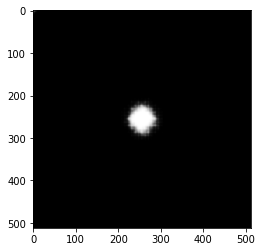

In [ ]:
img = autoencoder(x_train[0].reshape(1, 512, 512))
img = np.array(img).reshape(512, 512)
plt.imshow(img, cmap="gray")

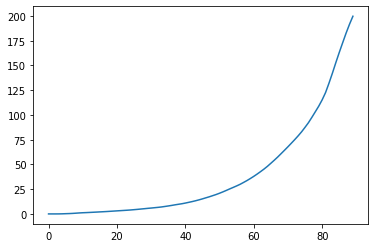

In [ ]:
plt.plot(results)